In [1]:
!nvidia-smi

Thu Oct  8 03:20:47 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.23.05    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   51C    P8    10W /  70W |      0MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

# KerasのRecurrentレイヤー

Kerasには複数のRecurrentレイヤーや、それに関連したクラスが用意されています。今回のSprintではこれら全てを動かした上で、それぞれの役割を説明できる状態を目指します。


以下のドキュメントにまとめられています。


[Recurrentレイヤー - Keras Documentation](https://keras.io/ja/layers/recurrent/)

## 【問題1】各種手法の実行
Kerasには4種類のReccurentレイヤーが用意されています。SimpleRNN以外はゲート付きリカレントニューラルネットワークです。


- SimpleRNN
- GRU
- LSTM
- ConvLSTM2D

これらを実行してください。この中でSimpleRNN、GRU、LSTMは同様のタスクに用いることができるため、精度の比較も行なってください。


Keras公式のサンプルコードを利用してください。


LSTMのサンプルコード


[keras/imdb_lstm.py at master · keras-team/keras](https://github.com/keras-team/keras/blob/master/examples/imdb_lstm.py)


ConvLSTM2Dのサンプルコード


[keras/conv_lstm.py at master · keras-team/keras](https://github.com/keras-team/keras/blob/master/examples/conv_lstm.py)


このサンプルコードをそのまま使う必要はなく、ノード数やエポックなどは変更して構いません。全て実行する上での実行時間を考慮した数に設定してください。

In [3]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import SimpleRNN, GRU, LSTM
from keras.layers.convolutional import Conv3D
from keras.layers.convolutional_recurrent import ConvLSTM2D
from keras.layers.normalization import BatchNormalization
from tensorflow.keras import backend as K

In [4]:
from keras.datasets import imdb
max_features = 20000
# cut texts after this number of words (among top max_features most common words)
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

17465344/17464789 [==============================] - 0s 0us/step


In [5]:
maxlen = 80
batch_size = 32

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

Pad sequences (samples x time)
x_train shape: (25000, 80)
x_test shape: (25000, 80)


### Simple RNN

In [6]:
K.clear_session()
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(SimpleRNN(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 128)         2560000   
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 128)               32896     
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 2,593,025
Trainable params: 2,593,025
Non-trainable params: 0
_________________________________________________________________


In [7]:
# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=3,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Epoch 1/3
782/782 [==============================] - 98s 125ms/step - loss: 0.6877 - accuracy: 0.5442 - val_loss: 0.6576 - val_accuracy: 0.5897
Epoch 2/3
782/782 [==============================] - 98s 125ms/step - loss: 0.6040 - accuracy: 0.6644 - val_loss: 0.6359 - val_accuracy: 0.6263
Epoch 3/3
782/782 [==============================] - 6s 7ms/step - loss: 0.6316 - accuracy: 0.6276
Test score: 0.6315714716911316
Test accuracy: 0.6276000142097473


### GRU

In [8]:
K.clear_session()
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(GRU(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 128)         2560000   
_________________________________________________________________
gru (GRU)                    (None, 128)               99072     
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 2,659,201
Trainable params: 2,659,201
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=3,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Epoch 1/3
782/782 [==============================] - 242s 309ms/step - loss: 0.4325 - accuracy: 0.7931 - val_loss: 0.3678 - val_accuracy: 0.8394
Epoch 2/3
782/782 [==============================] - 247s 315ms/step - loss: 0.2444 - accuracy: 0.9021 - val_loss: 0.3552 - val_accuracy: 0.8483
Epoch 3/3
782/782 [==============================] - 17s 22ms/step - loss: 0.4606 - accuracy: 0.8356
Test score: 0.46057233214378357
Test accuracy: 0.8356000185012817


### LSTM

In [10]:
K.clear_session()
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 128)         2560000   
_________________________________________________________________
lstm (LSTM)                  (None, 128)               131584    
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 2,691,713
Trainable params: 2,691,713
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=3,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Epoch 1/3
782/782 [==============================] - 272s 347ms/step - loss: 0.4309 - accuracy: 0.7930 - val_loss: 0.3542 - val_accuracy: 0.8415
Epoch 2/3
782/782 [==============================] - 271s 347ms/step - loss: 0.2510 - accuracy: 0.8996 - val_loss: 0.3862 - val_accuracy: 0.8240
Epoch 3/3
782/782 [==============================] - 17s 22ms/step - loss: 0.4525 - accuracy: 0.8286
Test score: 0.45246821641921997
Test accuracy: 0.8285599946975708


比較結果<br>
SimpleRNN << LSTM < GRUの結果となった。ゲート付きのモデルの方が精度が高い。

### ConvLSTM2D

In [12]:
K.clear_session()

seq = Sequential()
seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   input_shape=(None, 40, 40, 1),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(Conv3D(filters=1, kernel_size=(3, 3, 3),
               activation='sigmoid',
               padding='same', data_format='channels_last'))
seq.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_lst_m2d (ConvLSTM2D)    (None, None, 40, 40, 40)  59200     
_________________________________________________________________
batch_normalization (BatchNo (None, None, 40, 40, 40)  160       
_________________________________________________________________
conv_lst_m2d_1 (ConvLSTM2D)  (None, None, 40, 40, 40)  115360    
_________________________________________________________________
batch_normalization_1 (Batch (None, None, 40, 40, 40)  160       
_________________________________________________________________
conv_lst_m2d_2 (ConvLSTM2D)  (None, None, 40, 40, 40)  115360    
_________________________________________________________________
batch_normalization_2 (Batch (None, None, 40, 40, 40)  160       
_________________________________________________________________
conv_lst_m2d_3 (ConvLSTM2D)  (None, None, 40, 40, 40)  1

In [13]:
seq.compile(loss='binary_crossentropy', optimizer='adadelta')

Epoch 1/3
95/95 [==============================] - 47s 500ms/step - loss: 0.8390 - val_loss: 0.6861
Epoch 2/3
95/95 [==============================] - 46s 488ms/step - loss: 0.7778 - val_loss: 0.6612
Epoch 3/3
95/95 [==============================] - 47s 490ms/step - loss: 0.7412 - val_loss: 0.6331


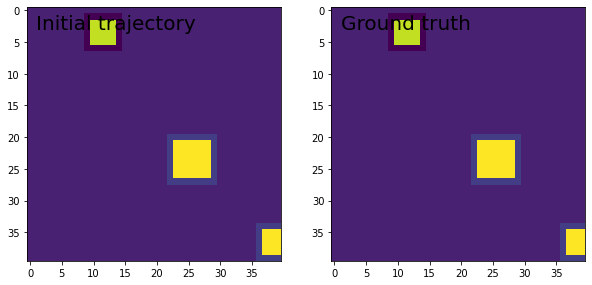

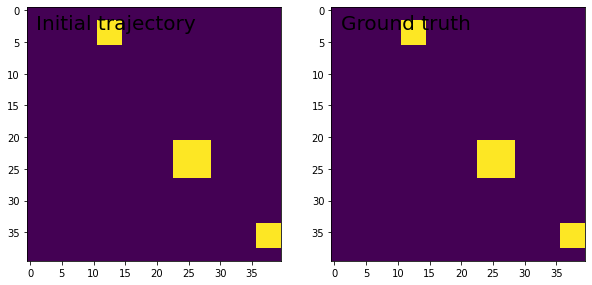

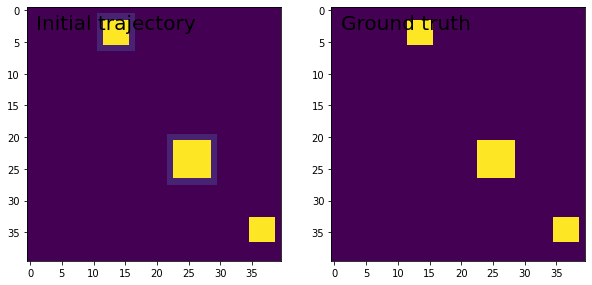

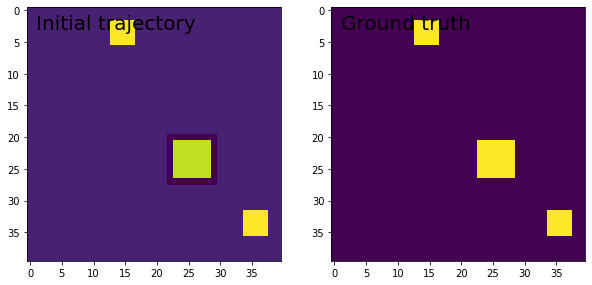

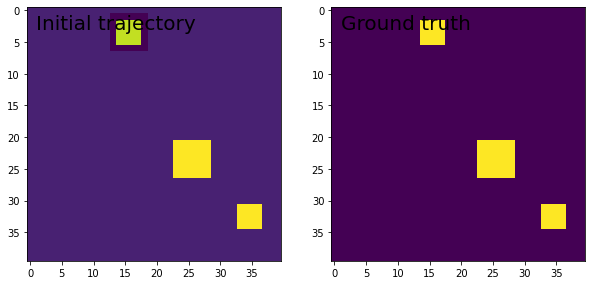

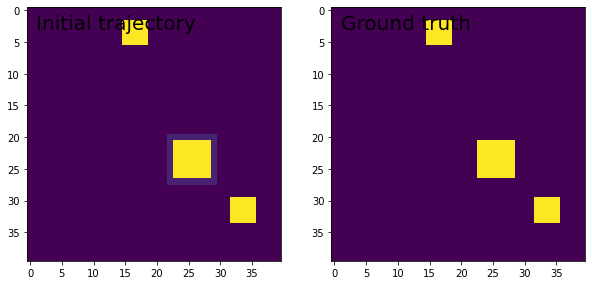

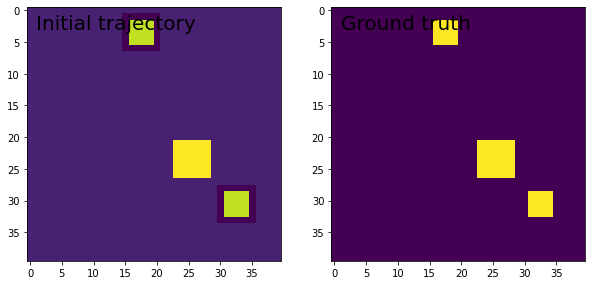

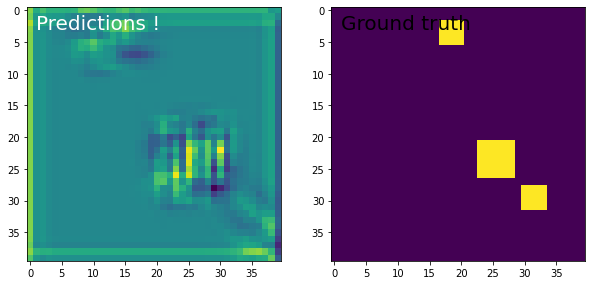

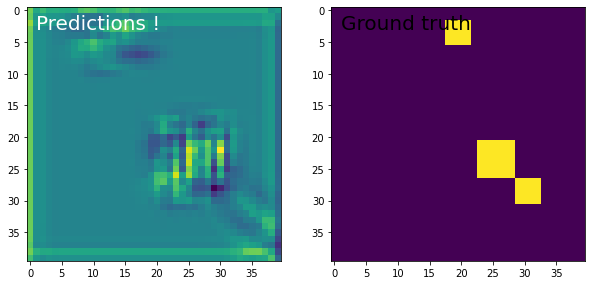

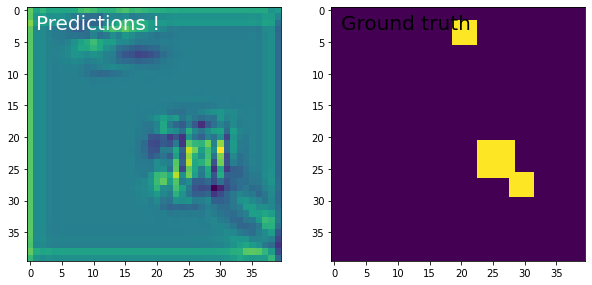

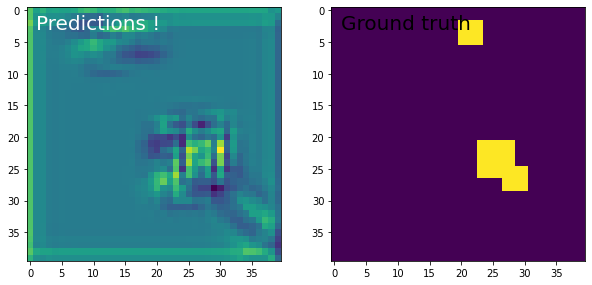

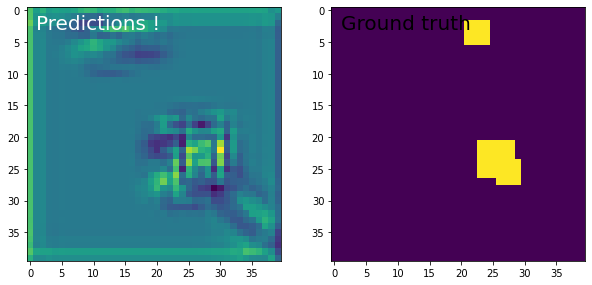

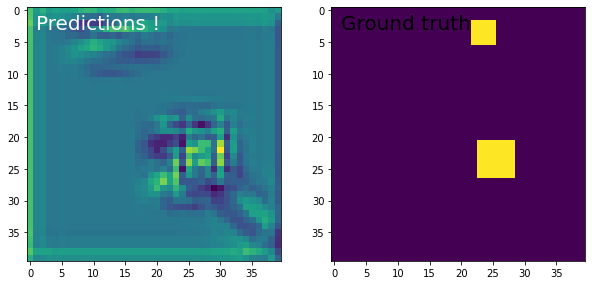

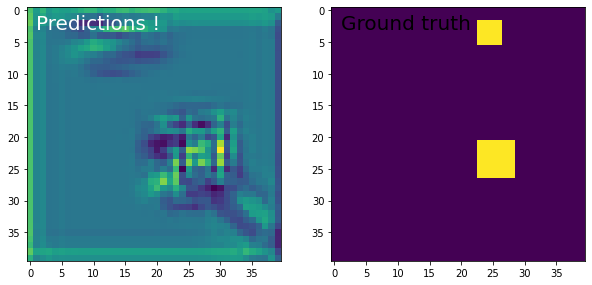

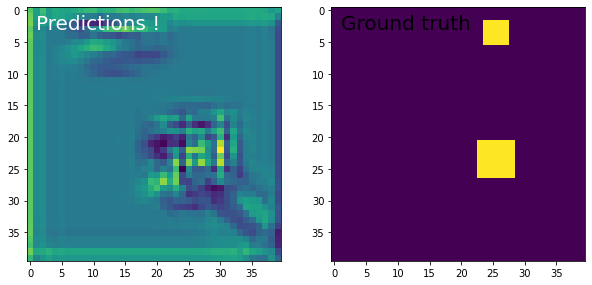

In [14]:
# Artificial data generation:
# Generate movies with 3 to 7 moving squares inside.
# The squares are of shape 1x1 or 2x2 pixels,
# which move linearly over time.
# For convenience we first create movies with bigger width and height (80x80)
# and at the end we select a 40x40 window.

def generate_movies(n_samples=1200, n_frames=15):
    row = 80
    col = 80
    noisy_movies = np.zeros((n_samples, n_frames, row, col, 1), dtype=np.float)
    shifted_movies = np.zeros((n_samples, n_frames, row, col, 1),
                              dtype=np.float)

    for i in range(n_samples):
        # Add 3 to 7 moving squares
        n = np.random.randint(3, 8)

        for j in range(n):
            # Initial position
            xstart = np.random.randint(20, 60)
            ystart = np.random.randint(20, 60)
            # Direction of motion
            directionx = np.random.randint(0, 3) - 1
            directiony = np.random.randint(0, 3) - 1

            # Size of the square
            w = np.random.randint(2, 4)

            for t in range(n_frames):
                x_shift = xstart + directionx * t
                y_shift = ystart + directiony * t
                noisy_movies[i, t, x_shift - w: x_shift + w,
                             y_shift - w: y_shift + w, 0] += 1

                # Make it more robust by adding noise.
                # The idea is that if during inference,
                # the value of the pixel is not exactly one,
                # we need to train the network to be robust and still
                # consider it as a pixel belonging to a square.
                if np.random.randint(0, 2):
                    noise_f = (-1)**np.random.randint(0, 2)
                    noisy_movies[i, t,
                                 x_shift - w - 1: x_shift + w + 1,
                                 y_shift - w - 1: y_shift + w + 1,
                                 0] += noise_f * 0.1

                # Shift the ground truth by 1
                x_shift = xstart + directionx * (t + 1)
                y_shift = ystart + directiony * (t + 1)
                shifted_movies[i, t, x_shift - w: x_shift + w,
                               y_shift - w: y_shift + w, 0] += 1

    # Cut to a 40x40 window
    noisy_movies = noisy_movies[::, ::, 20:60, 20:60, ::]
    shifted_movies = shifted_movies[::, ::, 20:60, 20:60, ::]
    noisy_movies[noisy_movies >= 1] = 1
    shifted_movies[shifted_movies >= 1] = 1
    return noisy_movies, shifted_movies

# Train the network
noisy_movies, shifted_movies = generate_movies(n_samples=1200)
seq.fit(noisy_movies[:1000], shifted_movies[:1000], batch_size=10,
        epochs=3, validation_split=0.05)

# Testing the network on one movie
# feed it with the first 7 positions and then
# predict the new positions
which = 1004
track = noisy_movies[which][:7, ::, ::, ::]

for j in range(16):
    new_pos = seq.predict(track[np.newaxis, ::, ::, ::, ::])
    new = new_pos[::, -1, ::, ::, ::]
    track = np.concatenate((track, new), axis=0)


# And then compare the predictions
# to the ground truth
track2 = noisy_movies[which][::, ::, ::, ::]
for i in range(15):
    fig = plt.figure(figsize=(10, 5))

    ax = fig.add_subplot(121)

    if i >= 7:
        ax.text(1, 3, 'Predictions !', fontsize=20, color='w')
    else:
        ax.text(1, 3, 'Initial trajectory', fontsize=20)

    toplot = track[i, ::, ::, 0]

    plt.imshow(toplot)
    ax = fig.add_subplot(122)
    plt.text(1, 3, 'Ground truth', fontsize=20)

    toplot = track2[i, ::, ::, 0]
    if i >= 2:
        toplot = shifted_movies[which][i - 1, ::, ::, 0]

    plt.imshow(toplot)
    plt.savefig('%i_animate.png' % (i + 1))

## 【問題2】（アドバンス課題）複数のデータセット間での比較
他のデータセットでも実験を行なってください。


[データセット - Keras Documentation](https://keras.io/ja/datasets/#_5)


Kerasで簡単に利用できる自然言語データセットとしてロイターのニュースワイヤー トピックス分類があります。

In [180]:
from keras.datasets import reuters

max_features = 20000
(x_train, y_train), (x_test, y_test) = reuters.load_data(path="reuters.npz",
                                                         num_words=max_features,
                                                         skip_top=0,
                                                         maxlen=None,
                                                         test_split=0.2,
                                                         seed=113,
                                                         start_char=1,
                                                         oov_char=2,
                                                         index_from=3)

In [181]:
len(reuters.get_word_index())

30979

In [184]:
# カテゴリ数を確認
display(np.unique(y_train)) # 46 categories
display(len(np.unique(y_train)))

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45])

46

In [174]:
'''
# カテゴリラベルをOne-hot encoding
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(sparse=False)
y_train = enc.fit_transform(y_train[:,np.newaxis])
y_test = enc.fit_transform(y_test[:,np.newaxis])
'''
# こちらだとGRUがうまくいかなかった

In [185]:
# カテゴリラベルをOne-hot encoding
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

### SimpleRNN

In [186]:
max_features = 20000
maxlen = 80
batch_size = 32

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

Pad sequences (samples x time)
x_train shape: (8982, 80)
x_test shape: (2246, 80)


In [187]:
K.clear_session()
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(SimpleRNN(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(46, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 128)         2560000   
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 128)               32896     
_________________________________________________________________
dense (Dense)                (None, 46)                5934      
Total params: 2,598,830
Trainable params: 2,598,830
Non-trainable params: 0
_________________________________________________________________


In [188]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=3,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Epoch 1/3
281/281 [==============================] - 32s 115ms/step - loss: 2.5705 - accuracy: 0.3218 - val_loss: 2.4120 - val_accuracy: 0.3620
Epoch 2/3
281/281 [==============================] - 33s 116ms/step - loss: 2.3115 - accuracy: 0.3801 - val_loss: 2.2149 - val_accuracy: 0.4159
Epoch 3/3
71/71 [==============================] - 1s 7ms/step - loss: 1.9479 - accuracy: 0.4546
Test score: 1.9478988647460938
Test accuracy: 0.4545859396457672


### GRU

In [189]:
K.clear_session()
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(GRU(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(46, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 128)         2560000   
_________________________________________________________________
gru (GRU)                    (None, 128)               99072     
_________________________________________________________________
dense (Dense)                (None, 46)                5934      
Total params: 2,665,006
Trainable params: 2,665,006
Non-trainable params: 0
_________________________________________________________________


In [190]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=3,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Epoch 1/3
281/281 [==============================] - 81s 288ms/step - loss: 2.0784 - accuracy: 0.4555 - val_loss: 1.7551 - val_accuracy: 0.5548
Epoch 2/3
281/281 [==============================] - 82s 290ms/step - loss: 1.5986 - accuracy: 0.5826 - val_loss: 1.6430 - val_accuracy: 0.5859
Epoch 3/3
71/71 [==============================] - 2s 21ms/step - loss: 1.5590 - accuracy: 0.6180
Test score: 1.5590206384658813
Test accuracy: 0.6179875135421753


### LSTM

In [192]:
K.clear_session()
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(46, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 128)         2560000   
_________________________________________________________________
lstm (LSTM)                  (None, 128)               131584    
_________________________________________________________________
dense (Dense)                (None, 46)                5934      
Total params: 2,697,518
Trainable params: 2,697,518
Non-trainable params: 0
_________________________________________________________________


In [193]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=3,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Epoch 1/3
281/281 [==============================] - 93s 330ms/step - loss: 2.2028 - accuracy: 0.4392 - val_loss: 1.7961 - val_accuracy: 0.5236
Epoch 2/3
281/281 [==============================] - 92s 327ms/step - loss: 1.6923 - accuracy: 0.5590 - val_loss: 1.6505 - val_accuracy: 0.5841
Epoch 3/3
71/71 [==============================] - 2s 23ms/step - loss: 1.4715 - accuracy: 0.6318
Test score: 1.4715217351913452
Test accuracy: 0.6317898631095886


やはりLSTMとGRUの精度が同じ水準で、ゲートなしのSimpleRNNより高精度。自然言語処理の予測は、ゲート機能のあるモデルが少ない学習で高精度を出せることがわかった。

## 【問題3】他のクラスの説明
ドキュメントには他にも関連するクラスが記載されています。それらがどういうものなのかを説明してください。この中には実際に扱うことは少ないクラスも含まれています。


- RNN
- SimpleRNNCell
- GRUCell
- LSTMCell
- StackedRNNCells
- CuDNNGRU
- CuDNNLSTM

- RNN

Recurrentレイヤーに対する基底クラス。引数で各Cell内の処理を定義する。

- SimpleRNNCell

SimpleRNN: 出力が入力にフィードバックされる全結合RNN
SimpleRNNの単Cellが実行する基本的な再帰処理。

- GRUCell

ゲート付きRNNの処理セル。更新ゲートとリセットゲートを実装しており、過去のセルからの情報を取捨選択できる機構を備えている。


- LSTMCell

LSTMレイヤーのためのcellクラス。入力、出力、忘却の３種流のゲートを実装している。


- StackedRNNCells

RNN cellのスタックの振る舞いを単一のcellのようにするためのラッパー．効率的なstacked RNNを実装するために使われます．
RNNセルに深さを与える機能。

- CuDNNGRU

GRUセルをGPU上で計算する

- CuDNNLSTM

LSTMセルをGPU上で計算する
